In [7]:
import pandas as pd

In [8]:
df = pd.read_csv('Data/Ridership.csv')
df.head()

,Year,Month,Day,Week Number,Corridor,Workday,Station,Period,Ridership,N_trains,Covid19
0,2019,January,1,1,Corridor_1,n,Station_1,Weekend/Holiday,174,3,0
1,2019,January,1,1,Corridor_1,n,Station_2,Weekend/Holiday,378,10,0
2,2019,January,1,1,Corridor_1,n,Station_3,Weekend/Holiday,599,12,0
3,2019,January,1,1,Corridor_2,n,Station_4,Weekend/Holiday,2759,35,0
4,2019,January,1,1,Corridor_2,n,Station_5,Weekend/Holiday,2629,36,0


In [9]:
month_mapping = {'January': 1, 'February': 2, 'March': 3, 'April': 4,
                 'May': 5, 'June': 6, 'July': 7, 'August': 8,
                 'September': 9, 'October': 10, 'November': 11, 'December': 12}

df['month'] = df['Month'].map(month_mapping)
df['Date'] = pd.to_datetime(df[['Year', 'month', 'Day']])
df.drop(columns=['month'], inplace=True)
df.sample(10)

,Year,Month,Day,Week Number,Corridor,Workday,Station,Period,Ridership,N_trains,Covid19,Date
59136,2022,September,9,36,Corridor_6,y,Station_31,AM Peak,313,2,0,2022-09-09
22790,2020,April,8,15,Corridor_7,y,Station_3,Evening,27,3,1,2020-04-08
36195,2021,March,31,13,Corridor_5,y,Station_3,PM Peak,421,4,1,2021-03-31
13542,2019,October,4,40,Corridor_5,y,Station_19,Midday,2136,2,0,2019-10-04
46601,2021,November,30,48,Corridor_1,y,Station_6,AM Peak,213,2,1,2021-11-30
61625,2022,November,3,44,Corridor_3,y,Station_3,AM Peak,893,6,0,2022-11-03
35738,2021,March,19,11,Corridor_1,y,Station_3,PM Peak,342,4,1,2021-03-19
32670,2020,December,29,53,Corridor_2,y,Station_3,Evening,243,8,1,2020-12-29
39834,2021,July,9,27,Corridor_6,y,Station_31,Midday,24,1,1,2021-07-09
60391,2022,October,7,40,Corridor_1,y,Station_3,PM Peak,1290,4,0,2022-10-07


In [ ]:
df.to_parquet('Data/parquet_by_day', engine='pyarrow', compression='snappy', partition_cols=['Date'])

In [9]:
from glob import glob

days_to_query = ['2019-01-01', '2019-01-02', '2019-01-03']
files_to_load = []

for day in days_to_query:
    files_to_load.extend(glob(f'Data/parquet_by_day/Date={day}%*/*.parquet'))

df_filtered = pd.concat([pd.read_parquet(file) for file in files_to_load], ignore_index=True)
df_filtered.sample(10)

,Year,Month,Day,Week Number,Corridor,Workday,Station,Period,Ridership,N_trains,Covid19
8,2019,January,1,1,Corridor_3,n,Station_3,Weekend/Holiday,17,1,0
20,2019,January,2,1,Corridor_4,y,Station_8,AM Peak,1702,2,0
111,2019,January,3,1,Corridor_2,y,Station_4,PM Peak,2970,5,0
15,2019,January,2,1,Corridor_1,y,Station_6,Midday,422,2,0
154,2019,January,3,1,Corridor_6,y,Station_3,PM Peak,2397,4,0
139,2019,January,3,1,Corridor_3,y,Station_5,Evening,4300,11,0
67,2019,January,2,1,Corridor_3,y,Station_3,Midday,55,2,0
39,2019,January,2,1,Corridor_2,y,Station_5,AM Peak,7546,11,0
82,2019,January,2,1,Corridor_7,y,Station_3,PM Peak,3487,4,0
59,2019,January,2,1,Corridor_3,y,Station_13,Midday,610,6,0


In [10]:
files_to_load2 = []
files_to_load2.extend(glob(f'Data/parquet_by_day/Date=*/*.parquet'))

df_filtered2 = pd.concat([pd.read_parquet(file) for file in files_to_load2], ignore_index=True)
df_filtered2.sample(10)

,Year,Month,Day,Week Number,Corridor,Workday,Station,Period,Ridership,N_trains,Covid19
1705,2019,January,31,5,Corridor_2,y,Station_3,PM Peak,2717,2,0
33656,2021,January,21,3,Corridor_3,y,Station_3,Midday,253,12,1
49095,2022,January,19,3,Corridor_5,y,Station_3,PM Peak,513,4,1
37921,2021,May,18,20,Corridor_3,y,Station_4,PM Peak,224,6,1
18090,2020,January,3,1,Corridor_3,y,Station_15,Midday,464,1,0
9715,2019,July,18,29,Corridor_3,y,Station_13,Midday,798,6,0
53951,2022,May,17,20,Corridor_7,y,Station_21,Midday,249,1,0
34543,2021,February,16,7,Corridor_4,y,Station_11,Midday,90,5,1
10034,2019,July,25,30,Corridor_4,y,Station_11,Midday,1028,6,0
39040,2021,June,17,24,Corridor_7,y,Station_3,Evening,48,1,1


In [ ]:
from glob import glob

days_to_query = ['2019-01-01', '2019-01-02', '2019-01-03']
files_to_load = []

for day in days_to_query:
    files_to_load.extend(glob(f'Data/parquet_by_day/Date={day}%*/*.parquet'))

df_filtered = pd.concat([pd.read_parquet(file, columns=['Year', 'Month', 'Day', 'Ridership']) for file in files_to_load], ignore_index=True)
df_filtered.sample(10)

,Year,Month,Day,Ridership
47,2019,January,2,274
126,2019,January,3,37
62,2019,January,2,2646
69,2019,January,2,1232
124,2019,January,3,325
104,2019,January,3,65
22,2019,January,2,535
128,2019,January,3,1091
70,2019,January,2,5816
122,2019,January,3,19


# July11th

In [6]:
import pandas as pd

df = pd.read_csv('Data/Ridership.csv')
df.sample(10)

,Year,Month,Day,Week Number,Corridor,Workday,Station,Period,Ridership,N_trains,Covid19
50635,2022,February,26,8,Corridor_3,n,Station_30,Weekend/Holiday,2884,19,0
9258,2019,July,9,28,Corridor_5,y,Station_19,AM Peak,8178,8,0
39453,2021,June,29,26,Corridor_3,y,Station_3,Midday,454,12,1
36957,2021,April,22,16,Corridor_4,y,Station_3,AM Peak,37,2,1
14804,2019,October,30,44,Corridor_7,y,Station_3,Midday,271,5,0
51721,2022,March,24,12,Corridor_2,y,Station_5,Evening,801,8,0
14372,2019,October,22,43,Corridor_7,y,Station_3,Evening,1584,7,0
40690,2021,August,3,31,Corridor_2,y,Station_5,Evening,447,8,1
25598,2020,June,26,26,Corridor_1,y,Station_2,Evening,18,2,1
30822,2020,November,13,46,Corridor_6,y,Station_20,Midday,28,1,1


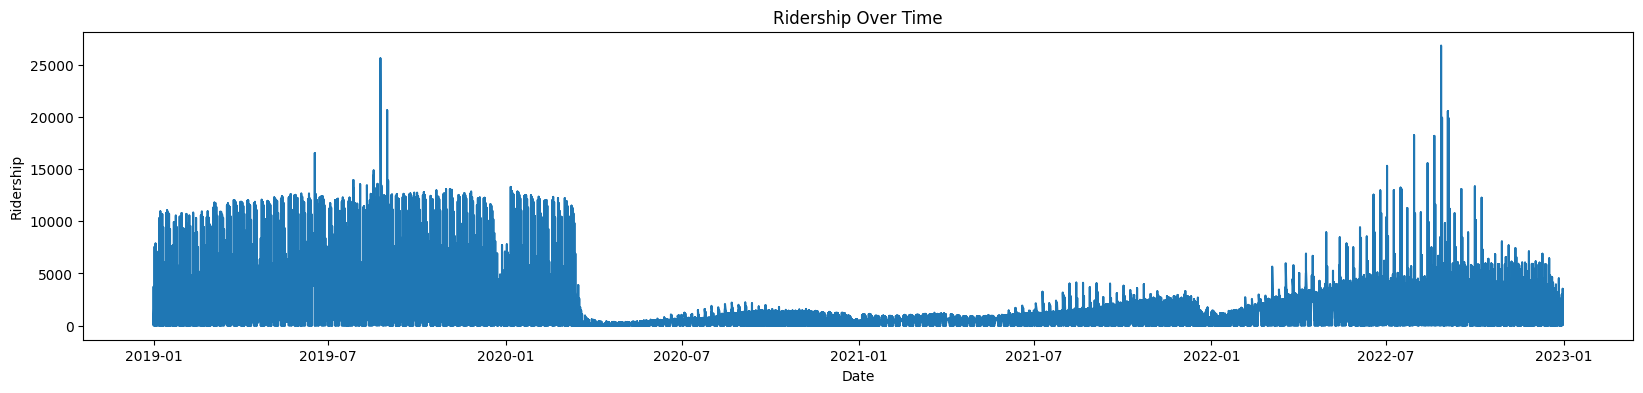

In [13]:
import matplotlib.pyplot as plt

def my_plot(x, y, xlabel, ylabel, title):
    plt.figure(figsize=(20, 4))
    plt.plot(x, y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

indexes = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'].map(month_mapping).astype(str) + '-' + df['Day'].astype(str))
my_plot(indexes, df['Ridership'], 'Date', 'Ridership', 'Ridership Over Time')

In [17]:
df.head()

,Year,Month,Day,Week Number,Corridor,Workday,Station,Period,Ridership,N_trains,Covid19,Date
0,2019,January,1,1,Corridor_1,n,Station_1,Weekend/Holiday,174,3,0,2019-01-01
1,2019,January,1,1,Corridor_1,n,Station_2,Weekend/Holiday,378,10,0,2019-01-01
2,2019,January,1,1,Corridor_1,n,Station_3,Weekend/Holiday,599,12,0,2019-01-01
3,2019,January,1,1,Corridor_2,n,Station_4,Weekend/Holiday,2759,35,0,2019-01-01
4,2019,January,1,1,Corridor_2,n,Station_5,Weekend/Holiday,2629,36,0,2019-01-01


In [33]:
grouped_df = df.groupby(['Year', 'Month']).aggregate({'Ridership': 'sum'}).reset_index()
years = grouped_df['Year'].unique()

grouped_df.head(5)

,Year,Month,Ridership
0,2019,April,3201955
1,2019,August,3521772
2,2019,December,2807918
3,2019,February,2801587
4,2019,January,3186261


In [34]:
years

array([2019, 2020, 2021, 2022])

In [35]:
grouped_df['Month_number'] = grouped_df['Month'].map(month_mapping)
grouped_df.sort_values(by=['Year', 'Month_number'], inplace=True)   

grouped_df.head()

,Year,Month,Ridership,Month_number
4,2019,January,3186261,1
3,2019,February,2801587,2
7,2019,March,3247025,3
0,2019,April,3201955,4
8,2019,May,3366421,5


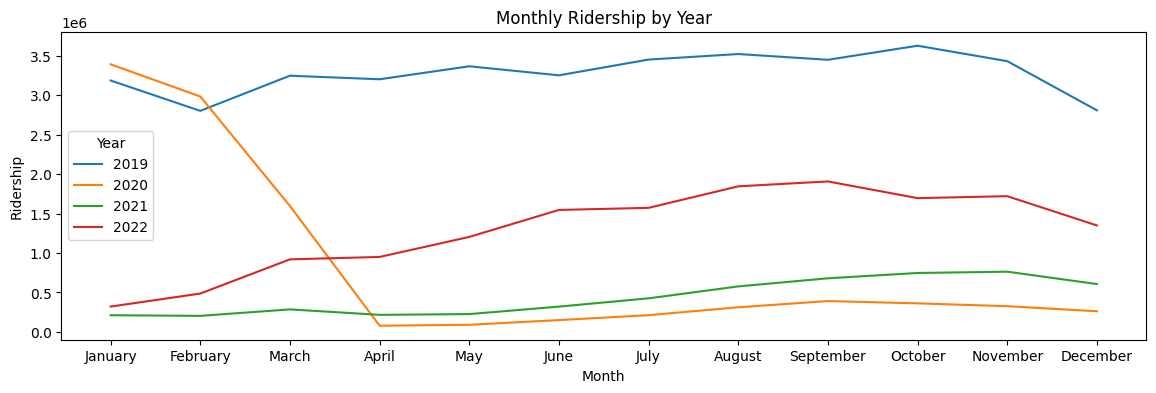

In [36]:
plt.figure(figsize=(14, 4))
for year in years:
    year_data = grouped_df[grouped_df['Year'] == year]
    plt.plot(year_data['Month'], year_data['Ridership'], label=str(year))

plt.xlabel('Month')
plt.ylabel('Ridership')
plt.title('Monthly Ridership by Year')
plt.legend(title='Year')

In [39]:
weekly_grouped_df = df.groupby(['Year', 'Week Number']).aggregate({'Ridership': 'sum'}).reset_index()
years = weekly_grouped_df['Year'].unique()

weekly_grouped_df.head(5)

,Year,Week Number,Ridership
0,2019,1,555004
1,2019,2,759778
2,2019,3,779986
3,2019,4,745794
4,2019,5,690214
